# Спринт 9. Проект: Определение стоимости автомобилей

## СОДЕРЖАНИЕ
<a id="title"></a>

* [План проекта](#plan)
    * [Описание проекта](#task_description)
    * [Инструкция по выполнению проекта](#task_rules)
    * [Описание данных](#data_description)    
    * [Как будут проверять мой проект?](#how_will_chech) 
* [Загрузка библиотек](#import_libs)  
* [Загрузка данных](#import_data)
    * [Первое впечатление](#first_impression)
* [Подготовка данных](#preparation_data)
    * [Предобработка данных](#data_preprocessing)
    * [Разделим на выборки](#split)
* [Обучение моделей](#model_training)
    * [LightGBM](#lightgbm)
    * [Логистическая регрессия](#linreg)
    * [Случайный лес](#randomforest)
* [Анализ моделей](#model_analysis)
    * [Качество моделей](#model_quality)
    * [Время обучения](#training_time)
    * [Время предсказания](#prediction_time)
    * [Краткие выводы](#short_resume)
* [Резюме](#resume)
* [Чеклист](#check_list)

## ПЛАН ПРОЕКТА
<a id="plan"></a>
[go to the title](#title)

### Описание проекта
<a id="task_description"></a>
[go to the title](#title)

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение, чтобы привлечь новых клиентов. В нём можно будет узнать рыночную стоимость своего автомобиля. 

Постройте модель, которая умеет её определять. В вашем распоряжении данные о технических характеристиках, комплектации и ценах других автомобилей.

Критерии, которые важны заказчику:
- качество предсказания;
- время обучения модели;
- время предсказания модели.

### Инструкция по выполнению проекта
<a id="task_rules"></a>
[go to the title](#title)

Чтобы усилить исследование, не ограничивайтесь градиентным бустингом. Попробуйте более простые модели — иногда они работают лучше. Эти редкие случаи легко пропустить, если всегда применять только бустинг. 
Поэкспериментируйте и сравните характеристики моделей: время обучения, время предсказания, точность результата.

#### Основные шаги:

1. Загрузите данные, путь к файлу:  /datasets/autos.csv.
2. Изучите данные. Заполните пропущенные значения и обработайте аномалии в столбцах. Если среди признаков имеются неинформативные, удалите их.
3. Подготовьте выборки для обучения моделей.
4. Обучите разные модели, одна из которых — LightGBM, как минимум одна — не бустинг. Для каждой модели попробуйте разные гиперпараметры.
5. Проанализируйте время обучения, время предсказания и качество моделей.
6. Опираясь на критерии заказчика, выберете лучшую модель, проверьте её качество на тестовой выборке.

Примечания:

- Для оценки качества моделей применяйте метрику RMSE.
- Значение метрики RMSE должно быть меньше 2500.
- Самостоятельно освойте библиотеку LightGBM и её средствами постройте модели градиентного бустинга.
- Время выполнения ячейки кода Jupyter Notebook можно получить специальной командой. Найдите её.
- Модель градиентного бустинга может долго обучаться, поэтому измените у неё только два-три параметра.
- Если перестанет работать Jupyter Notebook, удалите лишние переменные оператором del.

### Описание данных
<a id="data_description"></a>
[go to the title](#title)

#### Признаки

- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- Repaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя

#### Целевой признак
Price — цена (евро)

### Как будут проверять проект?
<a id="how_will_chech"></a>
[go to the title](#title)

На что обращают внимание ревьюеры, проверяя проект:

- Все ли шаги инструкции были выполнены?
- Как вы готовите данные?
- Какие модели и гиперпараметры вы рассматриваете?
- Не дублируете ли вы код?
- Какие выводы вы делаете?
- Следите ли вы за структурой проекта?
- Поддерживаете ли вы аккуратность кода?

## Загрузка библиотек
<a id="import_libs"></a>
[go to the title](#title)

In [1]:
# импорт необходимых библиотек
import numpy as np
import scipy as sc
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sb

## Загрузка данных
<a id="import_data"></a>
[go to the title](#title)

In [2]:
# Загрузим датасет
try:
    autos = pd.read_csv('/datasets/autos.csv')
except:
    autos = pd.read_csv('autos.csv')

### Первое впечатление
<a id="first_impression"></a>
[go to the title](#title)

In [3]:
# инфо по датасету:
print(autos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
# Посмотрим на первые 5 строк
display(autos.head())

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
# посмотрим на распределения в числовых данных
autos.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [6]:
# Количество полных дубликатов
print(autos.duplicated().sum()) 

4


количество дубликатов небольшое, ничего с ним делать не будем

In [7]:
# уникальные значения для категориальных переменных
categ_columns = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']
for column in categ_columns:
    print(f'Уникальные значения для столбца: {column}')
    print(autos[column].value_counts())
    print('количество пустых значений:', autos[column].isnull().sum(), end='\n\n')

Уникальные значения для столбца: VehicleType
sedan          91457
small          79831
wagon          65166
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: VehicleType, dtype: int64
количество пустых значений: 37490

Уникальные значения для столбца: Gearbox
manual    268251
auto       66285
Name: Gearbox, dtype: int64
количество пустых значений: 19833

Уникальные значения для столбца: Model
golf                  29232
other                 24421
3er                   19761
polo                  13066
corsa                 12570
                      ...  
serie_2                   8
serie_3                   4
rangerover                4
serie_1                   2
range_rover_evoque        2
Name: Model, Length: 250, dtype: int64
количество пустых значений: 19705

Уникальные значения для столбца: FuelType
petrol      216352
gasoline     98720
lpg           5310
cng            565
hybrid         233
other          204
elect

кажется скрытых дубликатов нет

In [8]:
# Посмотрим сколько весит датасет
autos_mem = autos.memory_usage().sum() / 1024**2
print('Вес исходного датасета: {:.2f} MB'.format(autos_mem))

Вес исходного датасета: 43.26 MB


## Подготовка данных
<a id="preparation_data"></a>
[go to the title](#title)

### Предобработка данных
<a id="data_preprocessing"></a>
[go to the title](#title)

In [9]:
# сделаем копию исходного датасета и удалим лишние столбцы
df = autos.copy()
# df = df.drop(['DateCrawled', 'LastSeen', 'NumberOfPictures', 'DateCreated', 'PostalCode'], axis=1)

#### заполняем Repaired

In [10]:
# заполним информацию о ремонте третьим типом: неизвестно
df['Repaired'] = df['Repaired'].fillna('unknown')

#### заполним Brand, VehicleType и Model

In [11]:
# сколько всего пропущеных значений
print('VehicleType is null & Model is null:', len(df[(df['VehicleType'].isnull()) & (df['Model'].isnull())]))
print('VehicleType is null & Model is not null:', len(df[(df['VehicleType'].isnull()) & ~(df['Model'].isnull())]))
print('VehicleType is not null & Model is null:', len(df[~(df['VehicleType'].isnull()) & (df['Model'].isnull())]))

VehicleType is null & Model is null: 6828
VehicleType is null & Model is not null: 30662
VehicleType is not null & Model is null: 12877


In [12]:
# сделаем табличку с самыми частыми сочетаниями Brand, VehicleType и Model
d1 = df[['Brand', 'VehicleType', 'Model']].value_counts().reset_index().rename({0: 'count'}, axis=1)
# display(d1.head())

In [13]:
# 
dv2 = d1.pivot_table(index=['Brand', 'Model'], aggfunc='max', values='count').reset_index()
# display(d2.head())

dv3 = dv2.merge(d1, on=['Brand', 'Model', 'count']).drop('count', axis=1).rename({'VehicleType': 'missing_vehicle_type'}, axis=1)
# display(d3.head())

dv4 = dv3.pivot_table(index=['Brand', 'Model'], aggfunc='first', values='missing_vehicle_type').reset_index()
display(dv4.head())

df = df.merge(dv4, on=['Brand', 'Model'], how='left')
# display(df.head(20))
df['VehicleType'] = df['VehicleType'].fillna(df['missing_vehicle_type'])
df = df.drop(['missing_vehicle_type'], axis=1)
# display(df.head(20))
print(df.info())

,Brand,Model,missing_vehicle_type
0,alfa_romeo,145,small
1,alfa_romeo,147,sedan
2,alfa_romeo,156,wagon
3,alfa_romeo,159,wagon
4,alfa_romeo,other,sedan


<class 'pandas.core.frame.DataFrame'>
Int64Index: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        347541 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           354369 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [14]:
# сколько всего пропущеных значений
print('VehicleType is null & Model is null:', len(df[(df['VehicleType'].isnull()) & (df['Model'].isnull())]))
print('VehicleType is null & Model is not null:', len(df[(df['VehicleType'].isnull()) & ~(df['Model'].isnull())]))
print('VehicleType is not null & Model is null:', len(df[~(df['VehicleType'].isnull()) & (df['Model'].isnull())]))

VehicleType is null & Model is null: 6828
VehicleType is null & Model is not null: 0
VehicleType is not null & Model is null: 12877


уже лучше)

In [15]:
# 
dm2 = d1.pivot_table(index=['Brand', 'VehicleType'], aggfunc='max', values='count').reset_index()
# display(d2.head())

dm3 = dm2.merge(d1, on=['Brand', 'VehicleType', 'count']).drop('count', axis=1).rename({'Model': 'missing_model'}, axis=1)
# display(d3.head())

dm4 = dm3.pivot_table(index=['Brand', 'VehicleType'], aggfunc='first', values='missing_model').reset_index()
display(dm4.head())

# соединим 

df = df.merge(dm4, on=['Brand', 'VehicleType'], how='left')
# display(df[~(df['VehicleType'].isnull()) & (df['Model'].isnull())].head(20))
df['Model'] = df['Model'].fillna(df['missing_model'])
df = df.drop(['missing_model'], axis=1)
# display(df[~(df['VehicleType'].isnull()) & (df['Model'].isnull())].head(20))
print(df.info())

,Brand,VehicleType,missing_model
0,alfa_romeo,convertible,spider
1,alfa_romeo,coupe,other
2,alfa_romeo,other,147
3,alfa_romeo,sedan,147
4,alfa_romeo,small,other


<class 'pandas.core.frame.DataFrame'>
Int64Index: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        347541 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              345206 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           354369 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [16]:
# сколько всего пропущеных значений. Проверим еще раз
print('VehicleType is null & Model is null:', len(df[(df['VehicleType'].isnull()) & (df['Model'].isnull())]))
print('VehicleType is null & Model is not null:', len(df[(df['VehicleType'].isnull()) & ~(df['Model'].isnull())]))
print('VehicleType is not null & Model is null:', len(df[~(df['VehicleType'].isnull()) & (df['Model'].isnull())]))

VehicleType is null & Model is null: 6828
VehicleType is null & Model is not null: 0
VehicleType is not null & Model is null: 2335


#### Заполним FuelType

In [17]:
df['FuelType'] = df['FuelType'].replace({'gasoline': 'petrol', 'cng': 'lpg'})

In [18]:
print(df['FuelType'].value_counts())

petrol      315072
lpg           5875
hybrid         233
other          204
electric        90
Name: FuelType, dtype: int64


In [19]:
d1 = df[['Brand', 'VehicleType', 'Model', 'FuelType']].value_counts().reset_index().rename({0: 'count'}, axis=1)
d_fu2 = d1.pivot_table(index=['Brand', 'VehicleType', 'Model'], aggfunc='max', values='count').reset_index()
d_fu3 = d_fu2.merge(d1, on=['Brand', 'VehicleType', 'Model', 'count']).drop('count', axis=1).rename({'FuelType': 'missing_fuel'}, axis=1)
d_fu4 = d_fu3.pivot_table(index=['Brand', 'VehicleType', 'Model'], aggfunc='first', values='missing_fuel').reset_index()
display(d_fu4.head())

df = df.merge(d_fu4, on=['Brand', 'VehicleType', 'Model'], how='left')
# display(df[~(df['VehicleType'].isnull()) & (df['Model'].isnull())].head(20))
df['FuelType'] = df['FuelType'].fillna(df['missing_fuel'])
df = df.drop(['missing_fuel'], axis=1)

,Brand,VehicleType,Model,missing_fuel
0,alfa_romeo,convertible,other,petrol
1,alfa_romeo,convertible,spider,petrol
2,alfa_romeo,coupe,145,petrol
3,alfa_romeo,coupe,147,petrol
4,alfa_romeo,coupe,156,petrol


#### Заполним Gearbox

In [20]:
d1 = df[['Brand', 'VehicleType', 'Model', 'Gearbox']].value_counts().reset_index().rename({0: 'count'}, axis=1)
d_fu2 = d1.pivot_table(index=['Brand', 'VehicleType', 'Model'], aggfunc='max', values='count').reset_index()
d_fu3 = d_fu2.merge(d1, on=['Brand', 'VehicleType', 'Model', 'count']).drop('count', axis=1).rename({'Gearbox': 'missing_gearbox'}, axis=1)
d_fu4 = d_fu3.pivot_table(index=['Brand', 'VehicleType', 'Model'], aggfunc='first', values='missing_gearbox').reset_index()
display(d_fu4.head())

df = df.merge(d_fu4, on=['Brand', 'VehicleType', 'Model'], how='left')
# display(df[~(df['VehicleType'].isnull()) & (df['Model'].isnull())].head(20))
df['Gearbox'] = df['Gearbox'].fillna(df['missing_gearbox'])
df = df.drop(['missing_gearbox'], axis=1)

,Brand,VehicleType,Model,missing_gearbox
0,alfa_romeo,convertible,other,manual
1,alfa_romeo,convertible,spider,manual
2,alfa_romeo,coupe,145,manual
3,alfa_romeo,coupe,147,manual
4,alfa_romeo,coupe,156,manual


#### Удалим лишние датасеты

In [21]:
del d1
del dv2
del dv3
del dv4
del dm2
del dm3
del dm4
del d_fu2
del d_fu3
del d_fu4

#### Посмотрим на распределение некоторых параметров

<AxesSubplot:xlabel='RegistrationYear', ylabel='Density'>

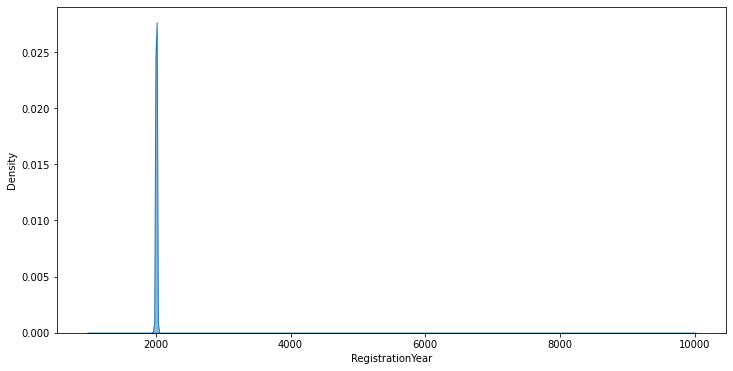

In [22]:
# Годы регистрации авто:
f, ax = plt.subplots(figsize=(12, 6))
sb.kdeplot(df['RegistrationYear']
           , gridsize=500
#            , legend=True
           , bw_adjust=1
           , common_grid=True
           , fill=True
           , alpha=0.5
           , label='train')

In [23]:
# Заменим тип со строкового на дату и построим распределение для даты выгрузки анкет:
df['DateCrawled'] = df['DateCrawled'].astype('datetime64')

<AxesSubplot:xlabel='DateCrawled', ylabel='Density'>

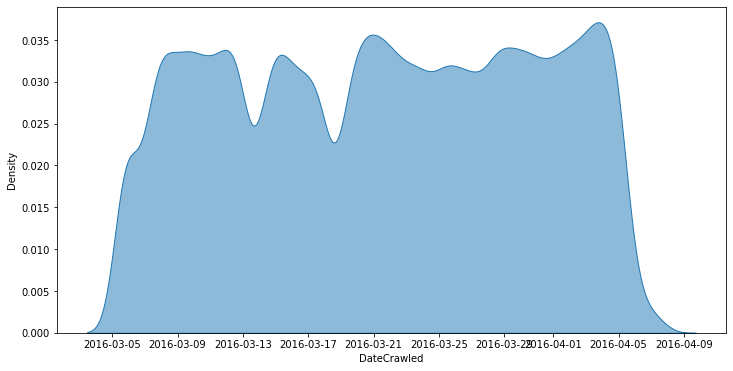

In [24]:
f, ax = plt.subplots(figsize=(12, 6))
sb.kdeplot(df['DateCrawled']
           , gridsize=500
#            , legend=True
           , bw_adjust=1
           , common_grid=True
           , fill=True
           , alpha=0.5
           , label='train')

In [25]:
print(len(df[(df['RegistrationYear'] > 2017)]))
print(len(df[(df['RegistrationYear'] < 1970)]))

4089
1338


In [26]:
df = df[(df['RegistrationYear'] < 2017)]

<AxesSubplot:xlabel='RegistrationYear', ylabel='Density'>

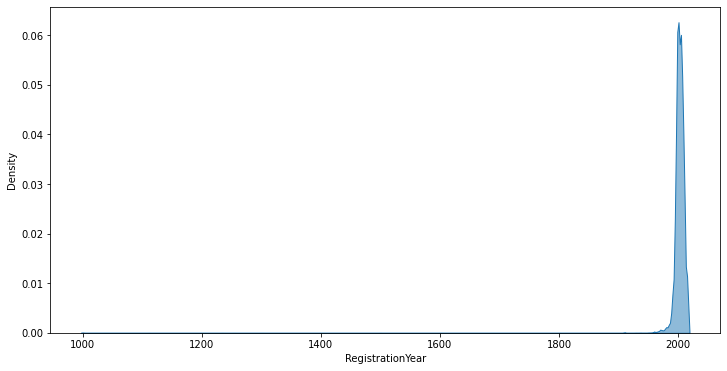

In [27]:
f, ax = plt.subplots(figsize=(12, 6))
sb.kdeplot(df['RegistrationYear']
           , gridsize=500
#            , legend=True
           , bw_adjust=1
           , common_grid=True
           , fill=True
           , alpha=0.5
           , label='train')

In [28]:
df = df[(df['RegistrationYear'] > 1970)]

<AxesSubplot:xlabel='RegistrationYear', ylabel='Density'>

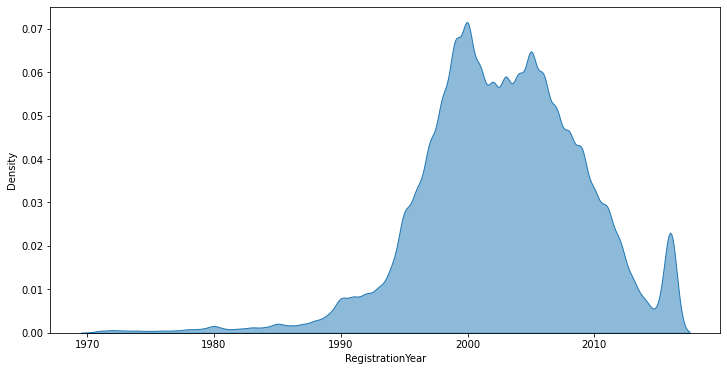

In [29]:
f, ax = plt.subplots(figsize=(12, 6))
sb.kdeplot(df['RegistrationYear']
           , gridsize=500
#            , legend=True
           , bw_adjust=1
           , common_grid=True
           , fill=True
           , alpha=0.5
           , label='train')

<AxesSubplot:xlabel='Power', ylabel='Density'>

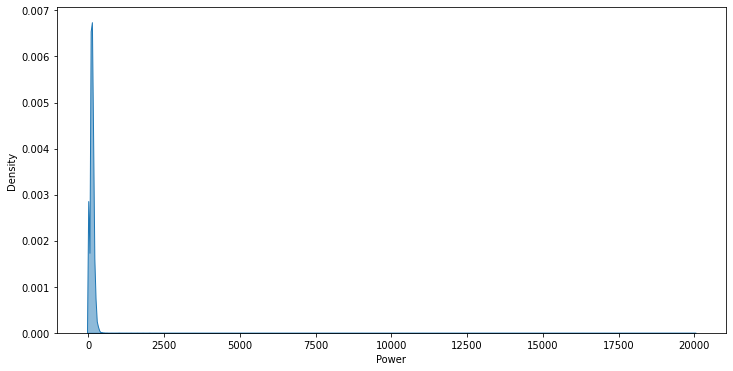

In [30]:
f, ax = plt.subplots(figsize=(12, 6))
sb.kdeplot(df['Power']
           , gridsize=500
#            , legend=True
           , bw_adjust=1
           , common_grid=True
           , fill=True
           , alpha=0.5
           , label='train')

<AxesSubplot:xlabel='Power', ylabel='Density'>

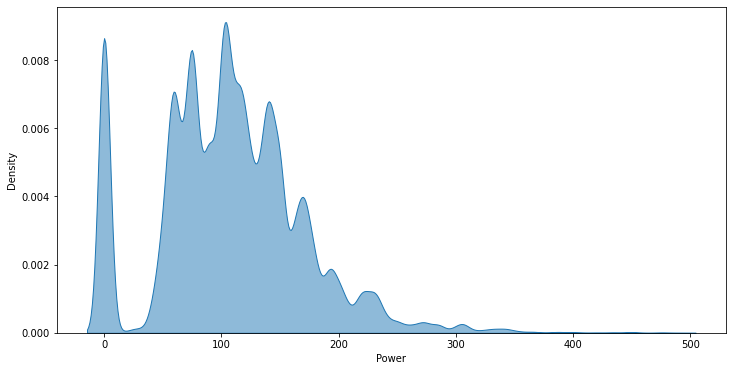

In [31]:
df = df[(df['Power'] < 500)]
f, ax = plt.subplots(figsize=(12, 6))
sb.kdeplot(df['Power']
           , gridsize=500
#            , legend=True
           , bw_adjust=1
           , common_grid=True
           , fill=True
           , alpha=0.5
           , label='train')

<AxesSubplot:xlabel='Power', ylabel='Density'>

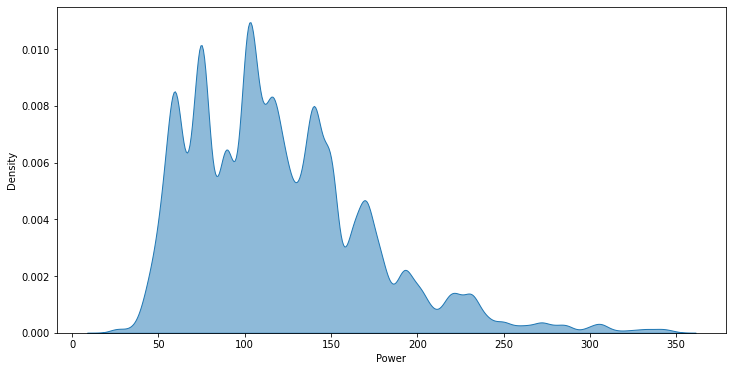

In [32]:
df = df[(df['Power'] < 350)]
df = df[(df['Power'] > 20)]
f, ax = plt.subplots(figsize=(12, 6))
sb.kdeplot(df['Power']
           , gridsize=500
#            , legend=True
           , bw_adjust=1
           , common_grid=True
           , fill=True
           , alpha=0.5
           , label='train')

<AxesSubplot:xlabel='Price', ylabel='Density'>

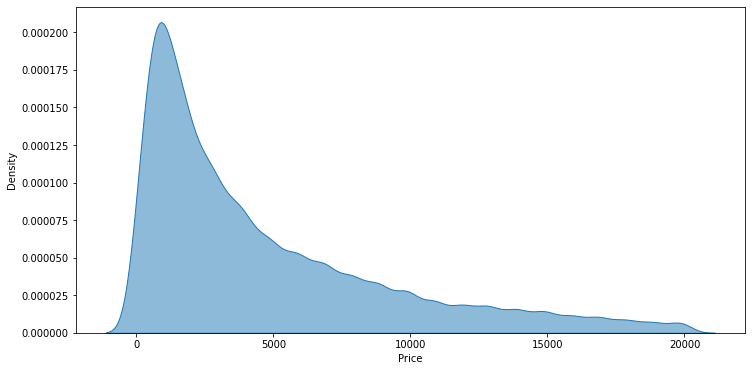

In [33]:
f, ax = plt.subplots(figsize=(12, 6))
sb.kdeplot(df['Price']
           , gridsize=500
#            , legend=True
           , bw_adjust=1
           , common_grid=True
           , fill=True
           , alpha=0.5
           , label='train')

In [34]:
df['Price'] = df['Price'].abs()

In [35]:
df[df['Price'] < 0]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen


<AxesSubplot:xlabel='Price', ylabel='Density'>

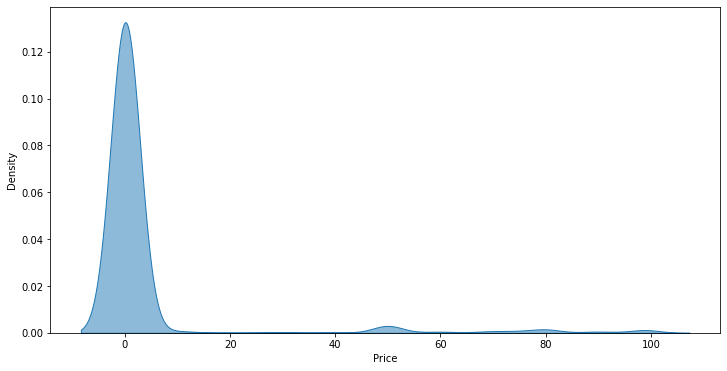

In [36]:
f, ax = plt.subplots(figsize=(12, 6))
sb.kdeplot(df[df['Price'] < 100]['Price']
           , gridsize=1000
#            , legend=True
           , bw_adjust=1
           , common_grid=True
           , fill=True
           , alpha=0.5
           , label='train')

<AxesSubplot:xlabel='Price', ylabel='Density'>

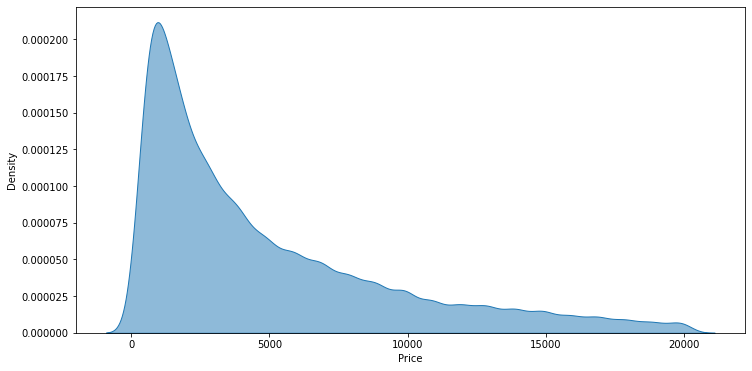

In [37]:
df = df[(df['Price'] > 200)]
f, ax = plt.subplots(figsize=(12, 6))
sb.kdeplot(df['Price']
           , gridsize=500
#            , legend=True
           , bw_adjust=1
           , common_grid=True
           , fill=True
           , alpha=0.5
           , label='train')

#### Удалим всё остальное

In [38]:
df = df.drop(['DateCrawled', 'LastSeen', 'NumberOfPictures', 'DateCreated', 'PostalCode'], axis=1)
df = df.dropna().reset_index()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286586 entries, 0 to 286585
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   index              286586 non-null  int64 
 1   Price              286586 non-null  int64 
 2   VehicleType        286586 non-null  object
 3   RegistrationYear   286586 non-null  int64 
 4   Gearbox            286586 non-null  object
 5   Power              286586 non-null  int64 
 6   Model              286586 non-null  object
 7   Kilometer          286586 non-null  int64 
 8   RegistrationMonth  286586 non-null  int64 
 9   FuelType           286586 non-null  object
 10  Brand              286586 non-null  object
 11  Repaired           286586 non-null  object
dtypes: int64(6), object(6)
memory usage: 26.2+ MB
None


### Разделим на выборки
<a id="split"></a>
[go to the title](#title)

In [39]:
# зададим параметр случайности выборки
random_state = 12345


# Создадим два массива features и target. 
features = df.drop(['Price'], axis=1)

target = df['Price']


# Для начала выделим из общего массива общий кусок 40% валидационной и тестовой выборки в сумме
features_train, features_valid, target_train, target_valid = train_test_split(features
                                                                              , target
                                                                              , test_size=0.4
                                                                              , random_state=random_state) 

# Разделим этот кусок пополам на тестовую и валидационную выборку
features_valid, features_test, target_valid, target_test = train_test_split(features_valid
                                                                            , target_valid
                                                                            , test_size=0.5
                                                                            , random_state=random_state)

# Размеры 3:1:1 
print('Размер тренировочной выборки:', features_train.shape, target_train.shape)
print('Размер валидационной выборки:', features_valid.shape, target_valid.shape)
print('Размер тестовой выборки:', features_test.shape, target_test.shape)

Размер тренировочной выборки: (171951, 11) (171951,)
Размер валидационной выборки: (57317, 11) (57317,)
Размер тестовой выборки: (57318, 11) (57318,)


### Преобразовываем категориальные признаки
<a id="data_preprocessing"></a>
[go to the title](#title)

In [40]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [41]:
from category_encoders import BinaryEncoder

In [42]:
encoder = BinaryEncoder(cols=categ_columns)
features_train = encoder.fit_transform(features_train)
features_valid = encoder.transform(features_valid)
features_test = encoder.transform(features_test)

In [44]:
df.describe()

,index,Price,RegistrationYear,Power,Kilometer,RegistrationMonth
count,286586.000000,286586.000000,286586.000000,286586.000000,286586.000000,286586.000000
mean,177194.136350,4903.788999,2003.009006,120.538983,128405.120976,6.032336
std,102257.691719,4575.323549,6.076220,51.182731,36494.037113,3.568934
min,1.000000,202.000000,1971.000000,21.000000,5000.000000,0.000000
25%,88560.250000,1400.000000,1999.000000,80.000000,125000.000000,3.000000
50%,177254.500000,3250.000000,2003.000000,113.000000,150000.000000,6.000000
75%,265731.750000,6999.000000,2007.000000,150.000000,150000.000000,9.000000
max,354368.000000,20000.000000,2016.000000,349.000000,150000.000000,12.000000


In [45]:
df = df.drop(['index'], axis=1)
# df = df.astype('int32')
display(df.head())
df_mem = df.memory_usage().sum() / 1024**2
print('Вес нового датасета: {:.2f} MB'.format(df_mem))

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired
0,18300,coupe,2011,manual,190,tt,125000,5,petrol,audi,yes
1,9800,suv,2004,auto,163,grand,125000,8,petrol,jeep,unknown
2,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
3,3600,small,2008,manual,69,fabia,90000,7,petrol,skoda,no
4,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes


Вес нового датасета: 24.05 MB


## Обучение моделей
<a id="model_training"></a>
[go to the title](#title)

### Линейная регрессия
<a id="linreg"></a>
[go to the title](#title)

In [46]:
%%time
# Обучим модель линейной регрессии
linreg = LinearRegression() 
linreg.fit(features_train, target_train)

CPU times: user 258 ms, sys: 234 ms, total: 492 ms
Wall time: 498 ms


LinearRegression()

In [47]:
%%time
predicted_valid = linreg.predict(features_valid)

CPU times: user 30.8 ms, sys: 87.4 ms, total: 118 ms
Wall time: 98.1 ms


In [48]:
# RMSE 
mse_linreg = mean_squared_error(target_valid, predicted_valid)
rmse_linreg = (mse_linreg) ** 0.5


print('Среднеквадратичное отклонение:',round(rmse_linreg, 2))

Среднеквадратичное отклонение: 2821.8


### Случайный лес
<a id="randomforest"></a>
[go to the title](#title)

In [49]:
%%time
#
estimantors = 20
for depth in range(6, 21, 2):
    rfr_n = RandomForestRegressor(random_state=random_state, n_estimators=estimantors, max_depth=depth)
    rfr_n.fit(features_train, target_train)
    predicted_valid = rfr_n.predict(features_valid)
    mse_rfr_n = mean_squared_error(target_valid, predicted_valid)
    rmse_rfr_n = (mse_rfr_n) ** 0.5

    print('Количество деревьев:', estimantors, '|', 'глубина:', depth, '|', 'RMSE:', round(rmse_rfr_n,2))

Количество деревьев: 20 | глубина: 6 | RMSE: 2194.68
Количество деревьев: 20 | глубина: 8 | RMSE: 2013.9
Количество деревьев: 20 | глубина: 10 | RMSE: 1862.75
Количество деревьев: 20 | глубина: 12 | RMSE: 1729.43
Количество деревьев: 20 | глубина: 14 | RMSE: 1641.29
Количество деревьев: 20 | глубина: 16 | RMSE: 1604.82
Количество деревьев: 20 | глубина: 18 | RMSE: 1596.76
Количество деревьев: 20 | глубина: 20 | RMSE: 1598.91
CPU times: user 1min 53s, sys: 763 ms, total: 1min 54s
Wall time: 1min 54s


In [66]:
%%time
depth = 18
for estimantors in range(40, 120, 20):
    rfr_n = RandomForestRegressor(random_state=random_state, n_estimators=estimantors, max_depth=depth)
    rfr_n.fit(features_train, target_train)
    predicted_valid = rfr_n.predict(features_valid)
    mse_rfr_n = mean_squared_error(target_valid, predicted_valid)
    rmse_rfr_n = (mse_rfr_n) ** 0.5

    print('Количество деревьев:', estimantors, '|', 'глубина:', depth, '|', 'RMSE:', round(rmse_rfr_n,2))

Количество деревьев: 40 | глубина: 18 | RMSE: 1578.66
Количество деревьев: 60 | глубина: 18 | RMSE: 1571.74
Количество деревьев: 80 | глубина: 18 | RMSE: 1568.88
Количество деревьев: 100 | глубина: 18 | RMSE: 1568.48
CPU times: user 4min 16s, sys: 2.47 s, total: 4min 19s
Wall time: 4min 20s


### LightGBM
<a id="lightgbm"></a>
[go to the title](#title)

In [51]:
%%time
model_lightgbm = lgb.LGBMRegressor(learning_rate=0.1)
model_lightgbm.fit(features_train, target_train)
predicted_valid = model_lightgbm.predict(features_valid)

mse_lightgbm = mean_squared_error(target_valid, predicted_valid)
rmse_lightgbm = (mse_lightgbm) ** 0.5

print('Максимальное количество итераций:', 20,'Среднеквадратичное отклонение:', round(rmse_lightgbm,2))

Максимальное количество итераций: 20 Среднеквадратичное отклонение: 1667.35
CPU times: user 5min 49s, sys: 2.88 s, total: 5min 52s
Wall time: 5min 55s


In [52]:
%%time
model_lightgbm = lgb.LGBMRegressor(learning_rate=1)
model_lightgbm.fit(features_train, target_train)
predicted_valid = model_lightgbm.predict(features_valid)

mse_lightgbm = mean_squared_error(target_valid, predicted_valid)
rmse_lightgbm = (mse_lightgbm) ** 0.5

print('Среднеквадратичное отклонение:', round(rmse_lightgbm,2))

Среднеквадратичное отклонение: 1693.25
CPU times: user 3min 6s, sys: 1.35 s, total: 3min 8s
Wall time: 3min 9s


In [53]:
%%time
model_lightgbm = lgb.LGBMRegressor(learning_rate=0.5, max_depth=10, n_estimators=20)
model_lightgbm.fit(features_train, target_train)
predicted_valid = model_lightgbm.predict(features_valid)

mse_lightgbm = mean_squared_error(target_valid, predicted_valid)
rmse_lightgbm = (mse_lightgbm) ** 0.5

print('Среднеквадратичное отклонение:', round(rmse_lightgbm,2))

Среднеквадратичное отклонение: 1718.15
CPU times: user 44.1 s, sys: 394 ms, total: 44.5 s
Wall time: 44.8 s


In [54]:
%%time
model_lightgbm = lgb.LGBMRegressor(learning_rate=0.5, max_depth=20, n_estimators=20)
model_lightgbm.fit(features_train, target_train)
predicted_valid = model_lightgbm.predict(features_valid)

mse_lightgbm = mean_squared_error(target_valid, predicted_valid)
rmse_lightgbm = (mse_lightgbm) ** 0.5

print('Среднеквадратичное отклонение:', round(rmse_lightgbm,2))

Среднеквадратичное отклонение: 1722.34
CPU times: user 58.7 s, sys: 620 ms, total: 59.3 s
Wall time: 59.9 s


In [55]:
%%time
model_lightgbm = lgb.LGBMRegressor(learning_rate=0.5, max_depth=20, n_estimators=100)
model_lightgbm.fit(features_train, target_train)
predicted_valid = model_lightgbm.predict(features_valid)

mse_lightgbm = mean_squared_error(target_valid, predicted_valid)
rmse_lightgbm = (mse_lightgbm) ** 0.5

print('Среднеквадратичное отклонение:', round(rmse_lightgbm,2))

Среднеквадратичное отклонение: 1602.32
CPU times: user 4min 15s, sys: 2.37 s, total: 4min 17s
Wall time: 4min 19s


In [56]:
%%time
model_lightgbm = lgb.LGBMRegressor(learning_rate=0.5, max_depth=6, n_estimators=20)
model_lightgbm.fit(features_train, target_train)
predicted_valid = model_lightgbm.predict(features_valid)

mse_lightgbm = mean_squared_error(target_valid, predicted_valid)
rmse_lightgbm = (mse_lightgbm) ** 0.5

print('Среднеквадратичное отклонение:', round(rmse_lightgbm,2))

Среднеквадратичное отклонение: 1754.8
CPU times: user 46.3 s, sys: 412 ms, total: 46.8 s
Wall time: 47.1 s


In [57]:
%%time
for depth in range(5, 16, 1):
    model_lightgbm = lgb.LGBMRegressor(learning_rate=0.5, max_depth=depth, n_estimators=20)
    model_lightgbm.fit(features_train, target_train)
    predicted_valid = model_lightgbm.predict(features_valid)

    mse_lightgbm = mean_squared_error(target_valid, predicted_valid)
    rmse_lightgbm = (mse_lightgbm) ** 0.5

    print('Depth:', depth, 'Среднеквадратичное отклонение:', round(rmse_lightgbm,2))

Depth: 5 Среднеквадратичное отклонение: 1783.37
Depth: 6 Среднеквадратичное отклонение: 1754.8
Depth: 9 Среднеквадратичное отклонение: 1730.08
Depth: 10 Среднеквадратичное отклонение: 1718.15
Depth: 12 Среднеквадратичное отклонение: 1719.66
Depth: 13 Среднеквадратичное отклонение: 1722.34
Depth: 14 Среднеквадратичное отклонение: 1722.34
Depth: 15 Среднеквадратичное отклонение: 1722.34
CPU times: user 11min 59s, sys: 9.3 s, total: 12min 8s
Wall time: 12min 13s


## Анализ моделей
<a id="model_analysis"></a>
[go to the title](#title)

### Время обучения
<a id="training_time"></a>
[go to the title](#title)

In [58]:
%%time
# Обучим модель линейной регрессии
linreg = LinearRegression() 
linreg.fit(features_train, target_train)

CPU times: user 228 ms, sys: 232 ms, total: 459 ms
Wall time: 485 ms


LinearRegression()

In [67]:
%%time
# 
rfr_n = RandomForestRegressor(random_state=random_state, n_estimators=80, max_depth=18)
rfr_n.fit(features_train, target_train)

CPU times: user 1min 15s, sys: 580 ms, total: 1min 16s
Wall time: 1min 16s


RandomForestRegressor(max_depth=18, n_estimators=80, random_state=12345)

In [60]:
%%time
#
model_lightgbm = lgb.LGBMRegressor(learning_rate=0.5, max_depth=20, n_estimators=100)
model_lightgbm.fit(features_train, target_train)

CPU times: user 5min 31s, sys: 2.78 s, total: 5min 34s
Wall time: 5min 37s


LGBMRegressor(learning_rate=0.5, max_depth=20)

Время обучения: Модель линейной регрессии справилась примерно за 500 мили секунд, Случайный лес обучался около минуты, Градиентный бустинг за 5,5 минут.

### Время предсказания
<a id="prediction_time"></a>
[go to the title](#title)

In [61]:
%%time
predicted_valid_linreg = linreg.predict(features_valid)

CPU times: user 37.4 ms, sys: 107 ms, total: 145 ms
Wall time: 104 ms


In [68]:
%%time
predicted_valid_rfr = rfr_n.predict(features_valid)

CPU times: user 1.5 s, sys: 8.25 ms, total: 1.51 s
Wall time: 1.51 s


In [63]:
%%time
predicted_valid_lightgbm = model_lightgbm.predict(features_valid)

CPU times: user 297 ms, sys: 7.34 ms, total: 304 ms
Wall time: 300 ms


Самое маленькое время предсказания у модели линейной регрессии, составляет примерно 100 мили секунд, в три раза больше время предсказания у модели градиентного бустинга и самое большое время у случайного леса - примерно 1.5 секунды, в пать раз превышает время градиентного бустинга.

### Качество моделей
<a id="model_quality"></a>
[go to the title](#title)

In [69]:
mse_linreg = mean_squared_error(target_valid, predicted_valid_linreg)
rmse_linreg = (mse_linreg) ** 0.5

print('RMSE линейной регрессии:', round(rmse_linreg, 2))


mse_rfr = mean_squared_error(target_valid, predicted_valid_rfr)
rmse_rfr = (mse_rfr) ** 0.5

print('RMSE случайного леса:', round(rmse_rfr,2))

mse_lightgbm = mean_squared_error(target_valid, predicted_valid_lightgbm)
rmse_lightgbm = (mse_lightgbm) ** 0.5

print('RMSE градиентного бустинга:', round(rmse_lightgbm,2))
    
    


RMSE линейной регрессии: 2821.8
RMSE случайного леса: 1568.88
RMSE градиентного бустинга: 1602.32


### Краткие выводы
<a id="short_resume"></a>
[go to the title](#title)

На два или даже три порядка быстрее всех модель линенйной регрессии, но точность у данной модели низкая и не подходит заказчику. 

На втором месте по скорости и по точности оказалась модель случайного леса. 

И самой долгой в обучении и в точности немного проигрывающей Случайному лесу оказалась модель градиентного бустинга. Плюсом данной модели служит меньшее время предсказания в сравнении с моделью Случайный лес.

## Вывод
<a id="resume"></a>
[go to the title](#title)

Была произведена очистка данных:
- Заполнены пропуски в ряде столбцов
- Удалены лишние параметры
- Удалены аномалии в данных

Было протестировано три типа моделей:
- Линейная регрессия
- Случайный лес
- Градиентный бустинг

По результатам лиейная регрессия не подходит по точности предсказания, а Случайный лес и Градиентный бустинг дают необходимую точность. 

В качестве модели для заказчика предлагается модель случайный лес.

In [70]:
%%time
predicted_test = rfr_n.predict(features_test)

mse_rfr = mean_squared_error(target_test, predicted_test)
rmse_rfr = (mse_rfr) ** 0.5

print('RMSE случайного леса:', round(rmse_rfr,2))

RMSE случайного леса: 1570.66
CPU times: user 1.47 s, sys: 4.36 ms, total: 1.47 s
Wall time: 1.47 s


## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей